In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [39]:
df=pd.read_csv("titanic_dataset.csv")
#print(df)

In [41]:
#print(df.to_string())

In [11]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
df['Age']=df['Age'].fillna(df['Age'].median()) 
df['Fare']=df['Fare'].fillna(df['Age'].median())
df['Cabin']=df['Cabin'].fillna("Unknown")
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [143]:
#print(df.to_string())

In [37]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [65]:
#because it has many missing values and we are only doing eda we can drop it to avoid fake pattern
df.drop(columns=['Cabin'],inplace=True)

In [59]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [67]:
#converting types
cols_to_convert=['Pclass','Sex','Embarked']
df[cols_to_convert]=df[cols_to_convert].astype('category')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 24.6+ KB


In [79]:
#Summary statistics
print(df.describe())

       PassengerId         Age       SibSp       Parch        Fare
count   418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000   30.272590    0.447368    0.392344   35.627188
std     120.810458   14.181209    0.896760    0.981429   55.907576
min     892.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000   39.000000    1.000000    0.000000   31.500000
max    1309.000000   76.000000    8.000000    9.000000  512.329200


In [85]:
print(df.nunique())

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
dtype: int64


In [91]:
print(df.head())

   PassengerId Pclass                                          Name     Sex  \
0          892      3                              Kelly, Mr. James    male   
1          893      3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894      2                     Myles, Mr. Thomas Francis    male   
3          895      3                              Wirz, Mr. Albert    male   
4          896      3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S  


In [95]:
print(df.tail(10))

     PassengerId Pclass                                             Name  \
408         1300      3                  Riordan, Miss. Johanna Hannah""   
409         1301      3                        Peacock, Miss. Treasteall   
410         1302      3                           Naughton, Miss. Hannah   
411         1303      1  Minahan, Mrs. William Edward (Lillian E Thorpe)   
412         1304      3                   Henriksson, Miss. Jenny Lovisa   
413         1305      3                               Spector, Mr. Woolf   
414         1306      1                     Oliva y Ocana, Dona. Fermina   
415         1307      3                     Saether, Mr. Simon Sivertsen   
416         1308      3                              Ware, Mr. Frederick   
417         1309      3                         Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Embarked  
408  female   NaN      0      0              334915    7.7208        Q  
409  female   3.0

In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 24.6+ KB
None


In [113]:
print("\t AVERAGE FARE BY GENDER")
print(df.groupby('Sex',observed=False)['Fare'].mean())

	 AVERAGE FARE BY GENDER
Sex
female    49.747699
male      27.527877
Name: Fare, dtype: float64


In [119]:
print("\t AVERAGE FAIR BY CLASS")
print(df.groupby('Pclass',observed=False)['Fare'].mean())

	 AVERAGE FAIR BY CLASS
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


In [127]:
print("\t AVERAGE AGE BY CLASS")
print(df.groupby('Pclass',observed=False)['Age'].mean())

	 AVERAGE AGE BY CLASS
Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


In [131]:
print("\t AVERAGE AGE BY GENDER")
print(df.groupby('Sex',observed=False)['Age'].mean())

	 AVERAGE AGE BY GENDER
Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64


In [137]:
print("\t FAIR RANGE BY CLASS")
print(df.groupby('Pclass',observed=False)['Fare'].agg(['min','max','mean','median']))

	 FAIR RANGE BY CLASS
           min       max       mean   median
Pclass                                      
1       0.0000  512.3292  94.280297  60.0000
2       9.6875   73.5000  22.202104  15.7500
3       3.1708   69.5500  12.459678   7.8958


In [141]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

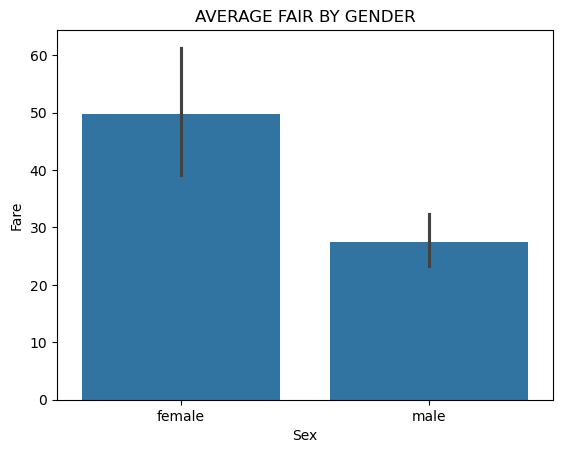

In [147]:
#Visualization
sns.barplot(x='Sex',y='Fare',data=df)
plt.title('AVERAGE FAIR BY GENDER')
plt.show()

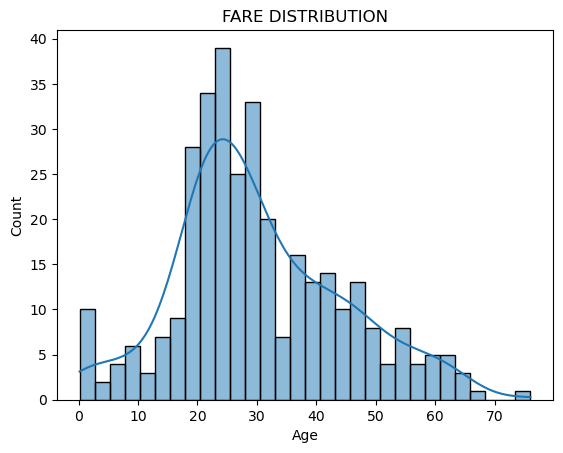

In [153]:
sns.histplot(df['Age'] , bins = 30 , kde=True)
plt.title('FARE DISTRIBUTION')
plt.show()

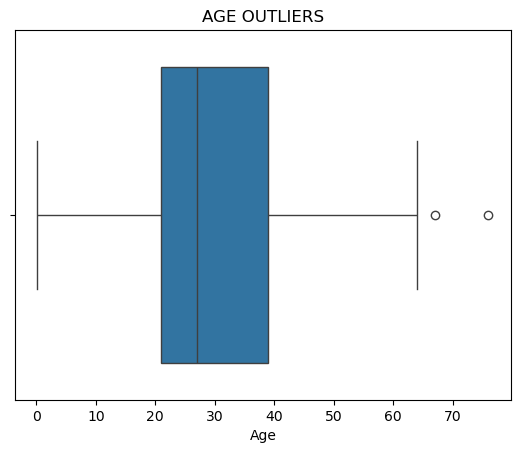

In [157]:
sns.boxplot(x=df['Age'])
plt.title('AGE OUTLIERS')
plt.show()


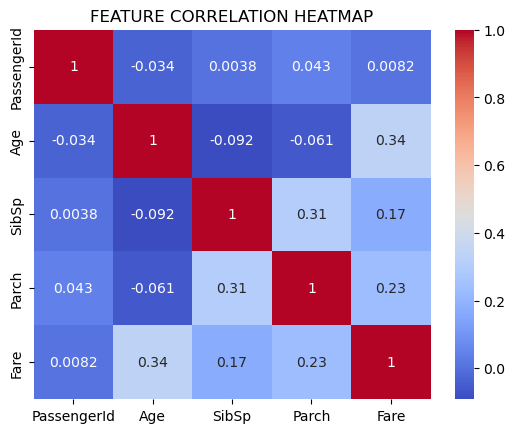

In [159]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('FEATURE CORRELATION HEATMAP')
plt.show()
